<a href="https://colab.research.google.com/github/somewhereovertherainbo/decision_trees/blob/main/decision_tree_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import random
import pprint as pprint

# Load and prepare data

In [2]:
csv_train = pd.read_csv('https://raw.githubusercontent.com/somewhereovertherainbo/decision_trees/main/data/kidney_disease_train.csv')
csv_test = pd.read_csv('https://raw.githubusercontent.com/somewhereovertherainbo/decision_trees/main/data/kidney_disease_test.csv')

In [3]:
csv_train.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,157,62.0,70.0,1.025,3.0,0.0,normal,abnormal,notpresent,notpresent,...,39.0,7900,3.9,yes,yes,no,good,no,no,ckd
1,109,54.0,70.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,...,NaN,NaN,NaN,no,yes,no,good,no,no,ckd
2,17,47.0,80.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,...,NaN,NaN,NaN,yes,no,no,poor,no,no,ckd
3,347,43.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,43.0,7200,5.5,no,no,no,good,no,no,notckd
4,24,42.0,100.0,1.015,4.0,0.0,normal,abnormal,notpresent,present,...,39.0,8300,4.6,yes,no,no,poor,no,no,ckd


In [4]:
csv_train['su'].value_counts()

0.0    199
1.0     12
2.0     11
3.0     10
4.0      8
5.0      2
Name: su, dtype: int64

In [5]:
csv_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              280 non-null    int64  
 1   age             275 non-null    float64
 2   bp              271 non-null    float64
 3   sg              244 non-null    float64
 4   al              245 non-null    float64
 5   su              242 non-null    float64
 6   rbc             173 non-null    object 
 7   pc              230 non-null    object 
 8   pcc             276 non-null    object 
 9   ba              276 non-null    object 
 10  bgr             247 non-null    float64
 11  bu              266 non-null    float64
 12  sc              268 non-null    float64
 13  sod             213 non-null    float64
 14  pot             212 non-null    float64
 15  hemo            241 non-null    float64
 16  pcv             229 non-null    float64
 17  wc              203 non-null    obj

In [6]:
csv_train.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [7]:
cat_cols = ['rbc','pc','pcc','ba','wc','rc',
            'cad','htn','dm','appet','pe','ane']

In [8]:
csv_train = csv_train.drop(['id','rbc','pc','pcc','ba','wc','rc',
                'cad','htn','dm','appet','pe','ane'], axis = 1)
csv_test = csv_test.drop(['id','rbc','pc','pcc','ba','wc','rc',
                'cad','htn','dm','appet','pe','ane'], axis = 1)

In [9]:
# check for null values
csv_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             275 non-null    float64
 1   bp              271 non-null    float64
 2   sg              244 non-null    float64
 3   al              245 non-null    float64
 4   su              242 non-null    float64
 5   bgr             247 non-null    float64
 6   bu              266 non-null    float64
 7   sc              268 non-null    float64
 8   sod             213 non-null    float64
 9   pot             212 non-null    float64
 10  hemo            241 non-null    float64
 11  pcv             229 non-null    float64
 12  classification  280 non-null    object 
dtypes: float64(12), object(1)
memory usage: 28.6+ KB


## First, we learn to work with numeric data only

In [10]:
csv_train['age'].fillna(csv_train['age'].median(), inplace = True)
csv_train['bp'].fillna(csv_train['bp'].mode()[0], inplace = True)
csv_train['al'].fillna(csv_train['al'].mode()[0], inplace = True)
csv_train['su'].fillna(csv_train['su'].mode()[0], inplace = True)
csv_train['sc'].fillna(csv_train['sc'].mode()[0], inplace = True)
csv_train['sg'].fillna(csv_train['sg'].mean(), inplace = True)
csv_train['bgr'].fillna(csv_train['bgr'].mean(), inplace = True)
csv_train['bu'].fillna(csv_train['bu'].mean(), inplace = True)
csv_train['pot'].fillna(csv_train['pot'].mean(), inplace = True)
csv_train['sod'].fillna(csv_train['sod'].mean(), inplace = True)
csv_train['hemo'].fillna(csv_train['hemo'].mean(), inplace = True)
csv_train['pcv'].fillna(csv_train['pcv'].mean(), inplace = True)

In [11]:
csv_test.replace('\t?', float('nan'), inplace = True)

In [12]:
csv_test['pcv'] = csv_test['pcv'].astype(float)

In [13]:
csv_test['age'].fillna(csv_test['age'].median(), inplace = True)
csv_test['bp'].fillna(csv_test['bp'].mode()[0], inplace = True)
csv_test['al'].fillna(csv_test['al'].mode()[0], inplace = True)
csv_test['su'].fillna(csv_test['su'].mode()[0], inplace = True)
csv_test['sc'].fillna(csv_test['sc'].mode()[0], inplace = True)
csv_test['sg'].fillna(csv_test['sg'].mean(), inplace = True)
csv_test['bgr'].fillna(csv_test['bgr'].mean(), inplace = True)
csv_test['bu'].fillna(csv_test['bu'].mean(), inplace = True)
csv_test['pot'].fillna(csv_test['pot'].mean(), inplace = True)
csv_test['sod'].fillna(csv_test['sod'].mean(), inplace = True)
csv_test['hemo'].fillna(csv_test['hemo'].mean(), inplace = True)
csv_test['pcv'].fillna(csv_test['pcv'].mean(), inplace = True)

In [14]:
csv_test.info(), csv_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     120 non-null    float64
 1   bp      120 non-null    float64
 2   sg      120 non-null    float64
 3   al      120 non-null    float64
 4   su      120 non-null    float64
 5   bgr     120 non-null    float64
 6   bu      120 non-null    float64
 7   sc      120 non-null    float64
 8   sod     120 non-null    float64
 9   pot     120 non-null    float64
 10  hemo    120 non-null    float64
 11  pcv     120 non-null    float64
dtypes: float64(12)
memory usage: 11.4 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             280 non-null    float64
 1   bp              280 non-null    float64
 2   sg              280 non-null    float64
 3   

(None, None)

# Adding Functionalities for algorithm

In [15]:
csv_train['classification'].value_counts().values.argmax()

0

In [16]:
def check_purity(df):

  label_column = df[df.columns[-1]]
  unique_classes = label_column.unique()

  if len(unique_classes)== 1:
    return True
  else:
    return False

In [17]:
def classify_data(df):

  label_column = df[df.columns[-1]]
  unique_classes = label_column.value_counts().index
  counts_unique_classes = label_column.value_counts().values

  index = counts_unique_classes.argmax()
  classification = unique_classes[index]

  return classification

In [18]:
def get_potential_splits(data):

  potential_splits = {}
  columns = data.columns

  for column_index in range(len(columns)-1):
    potential_splits[column_index] = []
    unique_values = data[columns[column_index]].unique()

    for i,j in zip(unique_values,unique_values[1:]):
      val = (i+j)/2
      potential_splits[column_index].append(val)

  return potential_splits

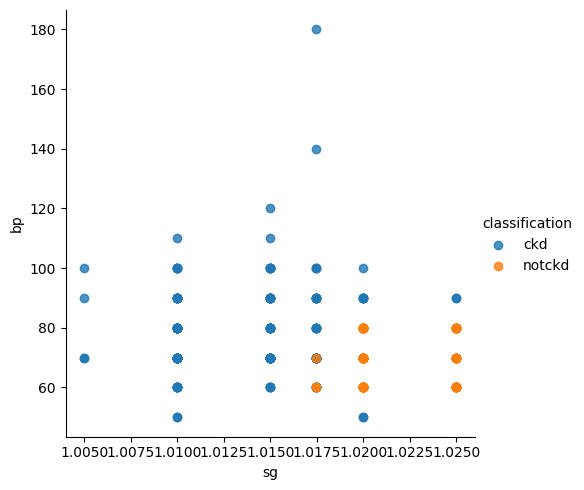

In [19]:
sns.lmplot(data = csv_train, x = 'sg', y = 'bp', hue = 'classification', fit_reg = False)

In [20]:
def split_data(data, split_column, split_value):

  split_column_values = data[data.columns[split_column]]

  data_below = data[split_column_values <= split_value]
  data_above = data[split_column_values > split_value]

  return data_below, data_above

### Lowest overall entropy

In [21]:
def calculate_entropy(data):

  label_column = data[data.columns[-1]]

  label_counts = label_column.value_counts().values
  probabilities = label_counts/label_counts.sum()
  entropy = sum(-probabilities * (np.log2(probabilities)))

  return entropy

In [22]:
def calculate_overall_entropy(data_below, data_above):

  n_data_points = len(data_below) + len(data_above)

  p_data_below = len(data_below)/ n_data_points
  p_data_above = len(data_above)/ n_data_points

  overall_entropy = (p_data_below*calculate_entropy(data_below)
                    + p_data_above*calculate_entropy(data_above))

  return overall_entropy

In [23]:
def determine_best_split(data, potential_splits):

  overall_entropy = 999
  for column_index in potential_splits:
    for value in potential_splits[column_index]:
      data_below, data_above = split_data(data, split_column=column_index, split_value=value)
      current_overall_entropy = calculate_overall_entropy(data_below, data_above)

      if current_overall_entropy <= overall_entropy:
        overall_entropy = current_overall_entropy
        best_split_column = column_index
        best_split_value = value

  return best_split_column, best_split_value


In [24]:
potential_splits = get_potential_splits(csv_train)
determine_best_split(csv_train, potential_splits)

(10, 12.85)

# Decision Tree Algorithm

In [61]:
def decision_tree_algorithm(data, counter = 0, min_samples = 5, max_depth = 5):

  if (check_purity(data)) or (len(data)<min_samples) or (counter == max_depth):
    classification = classify_data(data)
    return classification

  else:
    counter += 1
    potential_splits = get_potential_splits(data)
    split_column, split_value = determine_best_split(data, potential_splits)
    data_below, data_above = split_data(data, split_column, split_value)

    # make tree
    question = f'{data.columns[split_column]} <= {split_value}'
    sub_tree = {question: []}

    #find answers and make recursion
    yes_answer = decision_tree_algorithm(data_below, counter, min_samples, max_depth)
    no_answer = decision_tree_algorithm(data_above, counter, min_samples, max_depth)

    if yes_answer == no_answer:
      sub_tree = yes_answer

    else:
      sub_tree[question].append(yes_answer)
      sub_tree[question].append(no_answer)

    return sub_tree

In [62]:
tree = decision_tree_algorithm(csv_train, max_depth = 2)

In [63]:
tree

{'hemo <= 12.85': ['ckd', {'sg <= 1.0175': ['ckd', 'notckd']}]}